In [1]:
##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Welcome to my first code competition here, in this assignement im gonna show the probability of people survival,Currently learning a lot after looking through other codes on different ways to do them.
Enjoy.

first of all i will import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns,set()

(<module 'seaborn' from '/opt/conda/lib/python3.7/site-packages/seaborn/__init__.py'>,
 set())

and then i will import the data

**for the train:**

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**for the test:**

In [4]:
check = pd.read_csv('/kaggle/input/titanic/test.csv')
check.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**for the gender submission:**

In [5]:
gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Now I"m gonna check if there is a missing data 

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print('Amount of missing values in each column: ')
data.isnull().sum()

Amount of missing values in each column: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

i found out that there is a missing data for Cabin,Age,Embarked!
in the next steps I'm going to drop and take the averge of the this three variables, before that, I'm going to show some graphs from the given data:

**survival graph:** 
non-survival 0 
survival: 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

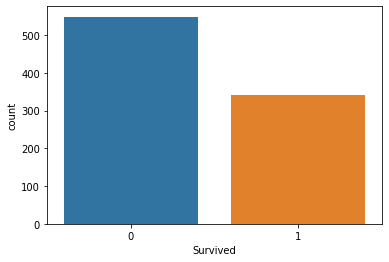

In [8]:
sns.countplot(x='Survived', data=data)

now I'll show a graph survivals according to gender, and diagnos if the gender of a person really affects survival.

In [9]:
data.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [10]:
pd.crosstab(data.Sex, data.Survived, normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


[Text(0.5, 0, 'No'), Text(1.5, 0, 'Yes')]

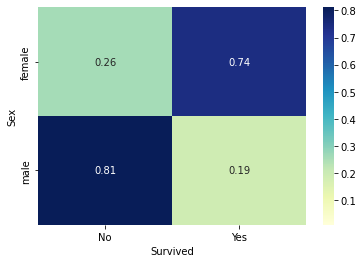

In [11]:
a = sns.heatmap(pd.crosstab(data.Sex, data.Survived, normalize='index'),vmin=0.01, cmap="YlGnBu", annot=True)
a.set_xticklabels(['No','Yes'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

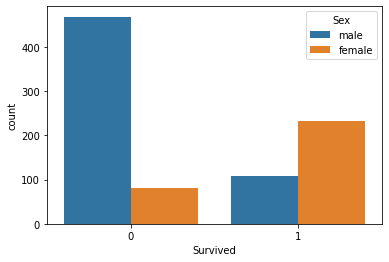

In [12]:
sns.countplot(x='Survived',hue='Sex', data=data)

[Text(0.5, 0, 'No'), Text(1.5, 0, 'Yes')]

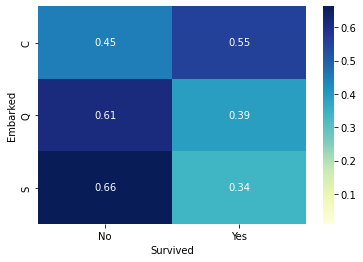

In [13]:
a = sns.heatmap(pd.crosstab(data.Embarked, data.Survived, normalize='index'),vmin=0.01, cmap="YlGnBu",annot=True)
a.set_xticklabels(['No','Yes'])

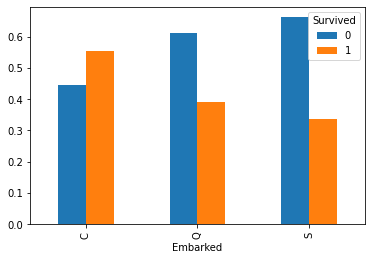

In [14]:
s = pd.crosstab(data.Embarked, data.Survived, normalize='index').plot(kind='bar')

In [15]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

now I'm gonna drop the missing data of the Cabin:

In [16]:
data.drop('Cabin',axis =1 , inplace = True)
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Embarked has only 2 missing values, im gonna drop them

In [17]:

data = data[data['Embarked'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


taking the mean of the Age:

In [18]:
data.fillna(data['Age'].mean(), inplace=True )

In [19]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


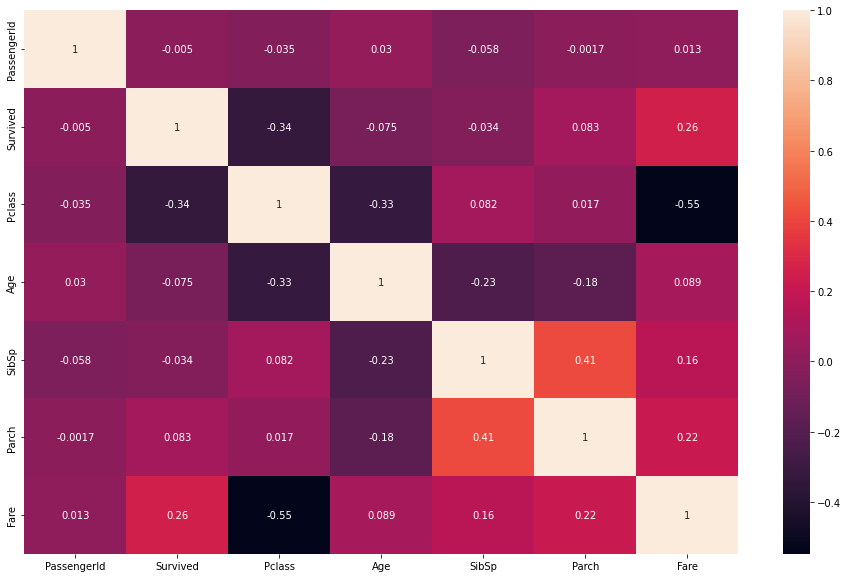

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

With the data cleaned we proceed to train and test models.

In [21]:
from sklearn.ensemble import RandomForestClassifier
y = data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data[features])
X_check = pd.get_dummies(check[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_check)

output = pd.DataFrame({'PassengerId': check.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission saved")

Submission saved


In [22]:

output.to_csv('submission.csv', index=False)